# 14. 활성화 함수의 이해

---------------------------
### 힉습 내용

2. 활성화 함수
  + 활성화 함수의 개념에 대해 알아봅니다.
3. 퍼셉트론
  + 활성화 함수가 나오게 된 배경을 살펴봅니다.
4. 선형과 비선형
  + 선형과 비선형의 정의를 짚어봅니다.
* **5~6** 비선형 함수를 쓰는 이유
  + 선형보다 비선형 함수가 더 좋은 이유에 대해 알아봅니다.    
* **7~12** 활성화 함수의 종류
  + 이지 계단 함수
  + 선형 활성화 함수
  + 비선형 활성화 함수-시그모이드, softmax
  + 비선형 활성화 함수 - 하이퍼볼릭 탄젠트
  + 비선형 활성화 함수 - ReLU
  + 비선형 활성화 함수 - ReLU의 단점을 극복하기 위한 시도들

In [1]:
# 쓰일 모듈 import
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from itertools import product
import tensorflow as tf
# /content/drive/MyDrive/Aiffel_Nodes/data_preprocess/jindo_dog.jpg

## 14-2. 활성화 함수

모델의 표현력을 향상시켜준다. 즉 선형으로 계산된 $xw+b$의 형태를 비선형성을 가진 활성화 함수를 거쳐 비선형 표현이 가능해진다.

## 14-3. 퍼셉트론

전에 배운 여러개의 층(Layer)를 겹친 모델을에서 하나의 층을 퍼셉트론이라 한다.
퍼셉트론은 뇌구조의 신경세포와 유사하게 설계하여 나온 개념이다.
![perceptron](https://d3s0tskafalll9.cloudfront.net/media/original_images/F-34-perceptron.png)
위 하나의 퍼셉트론을 식으로 정리하면 다음과 같다.
$$
X = \sum_{i=1}^{n} x_iw_i+b$$
$$
Y=f(X)$$
여기서 $f$는 활성화 함수이다.

## 14-4. 선형과 비선형

![선형변환정의](https://d3s0tskafalll9.cloudfront.net/media/images/F-34-transformation.max-800x600.png)

### 선형 변환 정의
$V$와 $W$가 어떤 벡터 공간에 있고 모두 실수 집합상에 있다고 가정한다.
이때 함수 $\mathcal{T}:V\to W$가 다음 두 조건을 만족할 때 함수$\mathcal{T}$를 선형변환(linear transformation)이라고 부른다.
* 가산성(Additivity) : 모든 $x,y\in V$에 대해,$$
\mathcal{T}(x+y)=\mathcal{T}(x)+\mathcal{T}(y)$$   
 
* 동차성(Homogeneity) : 모든 $x\in V,c\in \mathbb{R}$에 대해,$$
\mathcal{T}(cx)=c\mathcal{T}(x)$$

또한, 일반적으로 주어진 함수가 선형인지 확인해 볼때는 다음과 같은 성질을 이용한다.
$$
\mathcal{T}(cx+y)=c\mathcal{T}(x)+\mathcal{T}(y)$$ 

## 14-5. 비선형 함수를 쓰는 이유

**비선형(Non-linear)**는 간단히 선형이 아닌 함수를 말한다.

**모델의 표현력 향상**은 우리가 비선형 활성화 함수를 사용하는 이유이다.

여기서 왜 선형 함수는 표현력이 떨어지는가는 선형으로 이루어진 간단한 모델을 식을 통해서 풀어보면 알 수 있다. 3개의 레이어를 거친 결과와 과정은 하나의 식으로 표현 가능하고 이 뜻은 1000개의 선형함수 레이어를 거친 모델 또한 1개의 레이어를 거친 모델과 같다는 뜻이다.

## 14-7. 활성화 함수의 종류 (1) 이진 계단 함수

1. 이진 계단 함수(Binary step function)
2. 선형 활성화 함수(Linear activation function)
3. 비선형 활성화 함수(Non-linear activation function)

### 이진 계단 함수(Binary step function)
입력이 특정 임계점을 넘으면 1을 출력하고, 그렇지 않으면 0을 출력한다.


In [7]:
def binary_step(x, threshold=0): 
# threshold가 있는 함수를 쓰면 꼭 default 값을 설정해주세요
    return 0 if x<threshold else 1

In [9]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

def plot_and_visulize(image_url, function, derivative=False):
  X = [-10 + x/100 for x in range(2000)]
  y = [function(y) for y in X]

  plt.figure(figsize=(12,12))

  # 함수 그래프
  plt.subplot(3,2,1)
  plt.title('function')
  plt.plot(X,y)

  # 함수의 미분 그래프
  plt.subplot(3,2,2)
  plt.title('derivative')
  if derivative:
    dev_y = [derivative(y) for y in X]
    plt.plot(X,dev_y)
  
  # 무작위 샘플들 분포
  samples = np.random.rand(1000)
  samples -= np.mean(samples)
  plt.subplot(3,2,3)
  plt.title('samples')
  plt.hist(samples,100)

  # 활성화 함수를 통과한 샘플들 분포
  act_values = [function(y) for y in samples]
  plt.subplot(3,2,4)
  plt.title('activation values')
  plt.hist(act_values,100)
    
  # 원본 이미지
  image = np.array(Image.open(image_url), dtype=np.float64)[:,:,0]/255. # 구분을 위해 gray-scale해서 확인
  image -= np.median(image)
  plt.subplot(3,2,5)
  plt.title('origin image')
  plt.imshow(image, cmap='gray')
    
  # 활성화 함수를 통과한 이미지
  activation_image = np.zeros(image.shape)
  h, w = image.shape
  for i in range(w):
      for j in range(h):
          activation_image[j][i] += function(image[j][i])
  plt.subplot(3,2,6)
  plt.title('activation results')
  plt.imshow(activation_image, cmap='gray')
  
  return plt

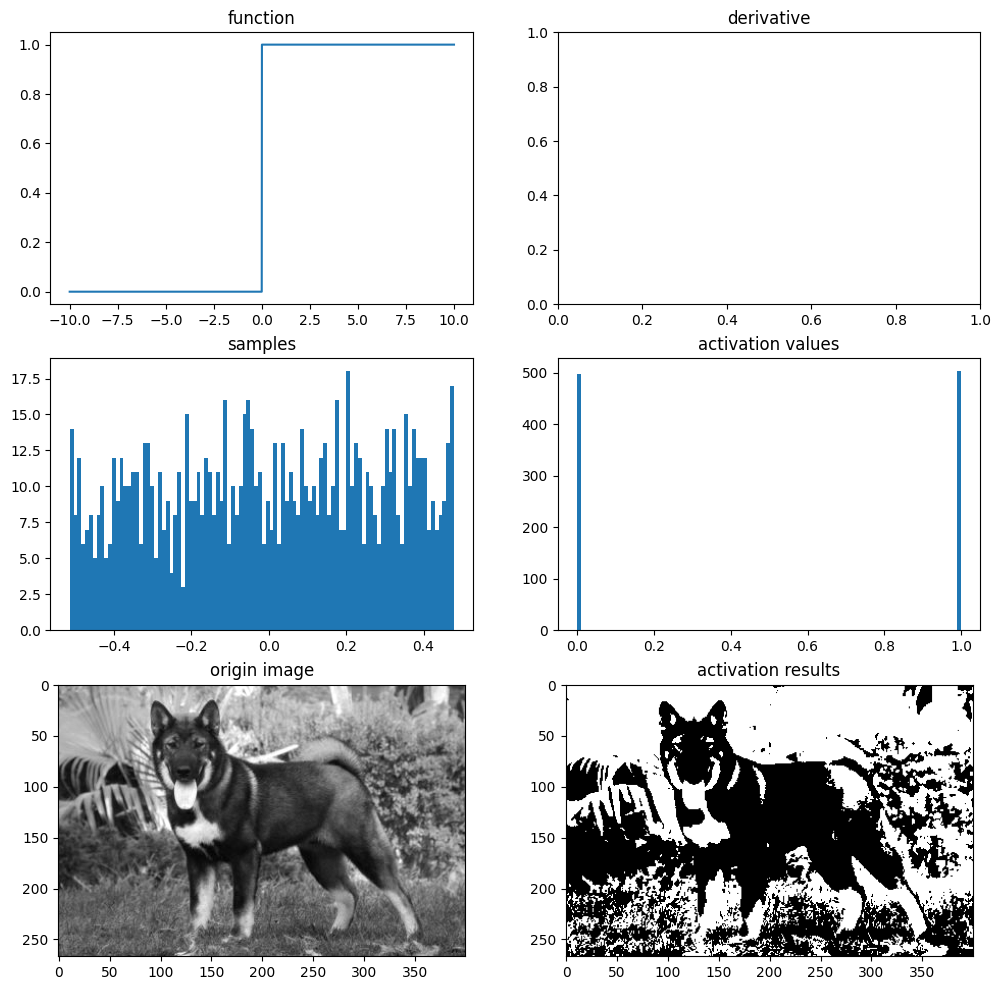

In [10]:
import os
img_path = '/content/drive/MyDrive/Aiffel_Nodes/data_preprocess/jindo_dog.jpg'
ax = plot_and_visulize(img_path, binary_step)
ax.show()

In [11]:
# 퍼셉트론
class Perceptron(object):
    def __init__(self, input_size, activation_ftn, threshold=0, learning_rate=0.01):
        self.weights = np.random.randn(input_size)
        self.bias = np.random.randn(1)
        self.activation_ftn = np.vectorize(activation_ftn)
        self.learning_rate = learning_rate
        self.threshold = threshold

    def train(self, training_inputs, labels, epochs=100, verbose=1):
        '''
        verbose : 1-매 에포크 결과 출력, 
                  0-마지막 결과만 출력 
        '''
        for epoch in range(epochs):
            for inputs, label in zip(training_inputs, labels):
                prediction = self.__call__(inputs)
                self.weights += self.learning_rate * (label - prediction) * inputs
                self.bias += self.learning_rate * (label - prediction)
            if verbose == 1:
                pred = self.__call__(training_inputs)
                accuracy = np.sum(pred==labels)/len(pred)
                print(f'{epoch}th epoch, accuracy : {accuracy}')
        if verbose == 0:
            pred = self.__call__(training_inputs)
            accuracy = np.sum(pred==labels)/len(pred)
            print(f'{epoch}th epoch, accuracy : {accuracy}')
    
    def get_weights(self):
        return self.weights, self.bias
                
    def __call__(self, inputs):
        summation = np.dot(inputs, self.weights) + self.bias
        return self.activation_ftn(summation, self.threshold)

In [12]:
def scatter_plot(plt, X, y, threshold = 0, three_d=False):
    ax = plt
    if not three_d:
        area1 = np.ma.masked_where(y <= threshold, y)
        area2 = np.ma.masked_where(y > threshold, y+1)
        ax.scatter(X[:,0], X[:,1], s = area1*10, label='True')
        ax.scatter(X[:,0], X[:,1], s = area2*10, label='False')
        ax.legend()
    else:
        area1 = np.ma.masked_where(y <= threshold, y)
        area2 = np.ma.masked_where(y > threshold, y+1)
        ax.scatter(X[:,0], X[:,1], y-threshold, s = area1, label='True')
        ax.scatter(X[:,0], X[:,1], y-threshold, s = area2, label='False')
        ax.scatter(X[:,0], X[:,1], 0, s = 0.05, label='zero', c='gray')
        ax.legend()
    return ax

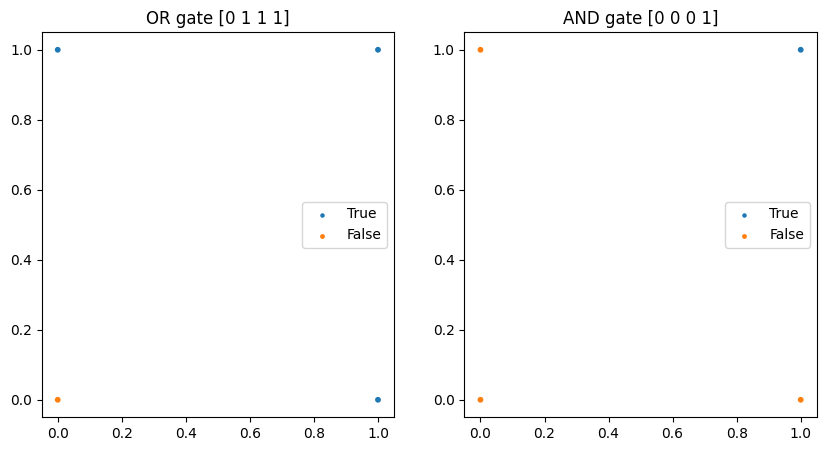

In [13]:
# AND gate, OR gate
X = np.array([[0,0], [1,0], [0,1], [1,1]])

plt.figure(figsize=(10,5))
# OR gate
or_y = np.array([x1 | x2 for x1,x2 in X])
ax1 = plt.subplot(1,2,1)
ax1.set_title('OR gate ' + str(or_y))
ax1 = scatter_plot(ax1, X, or_y)

# AND gate
and_y = np.array([x1 & x2 for x1,x2 in X])
ax2 = plt.subplot(1,2,2)
ax2.set_title('AND gate ' + str(and_y))
ax2 = scatter_plot(ax2, X, and_y)

plt.show()

In [14]:
# OR gate
or_p = Perceptron(input_size=2, activation_ftn=binary_step)
or_p.train(X, or_y, epochs=1000, verbose=0)
print(or_p.get_weights()) # 가중치와 편향값은 훈련마다 달라질 수 있습니다.

# AND gate
and_p = Perceptron(input_size=2, activation_ftn=binary_step)
and_p.train(X, and_y, epochs=1000, verbose=0)
print(and_p.get_weights()) # 가중치와 편향값은 훈련마다 달라질 수 있습니다.

999th epoch, accuracy : 1.0
(array([0.86273708, 0.00779436]), array([-0.00488702]))
999th epoch, accuracy : 1.0
(array([0.19054576, 0.5500606 ]), array([-0.72397347]))


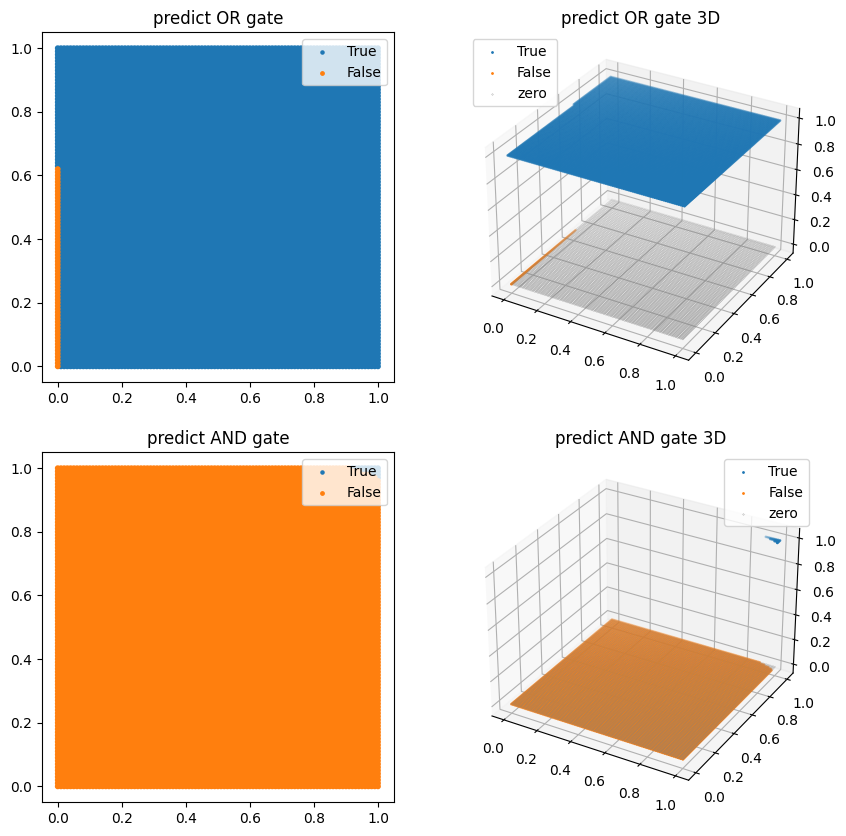

In [15]:
from itertools import product

# 그래프로 그려보기
test_X = np.array([[x/100,y/100] for (x,y) in product(range(101),range(101))])
pred_or_y = or_p(test_X)
pred_and_y = and_p(test_X)

plt.figure(figsize=(10,10))
ax1 = plt.subplot(2,2,1)
ax1.set_title('predict OR gate')
ax1 = scatter_plot(ax1, test_X, pred_or_y)

ax2 = plt.subplot(2,2,2, projection='3d')
ax2.set_title('predict OR gate 3D')
ax2 = scatter_plot(ax2, test_X, pred_or_y, three_d=True)

ax3 = plt.subplot(2,2,3)
ax3.set_title('predict AND gate')
ax3 = scatter_plot(ax3, test_X, pred_and_y)

ax4 = plt.subplot(2,2,4, projection='3d')
ax4.set_title('predict AND gate 3D')
ax4 = scatter_plot(ax4, test_X, pred_and_y, three_d=True)

plt.show()

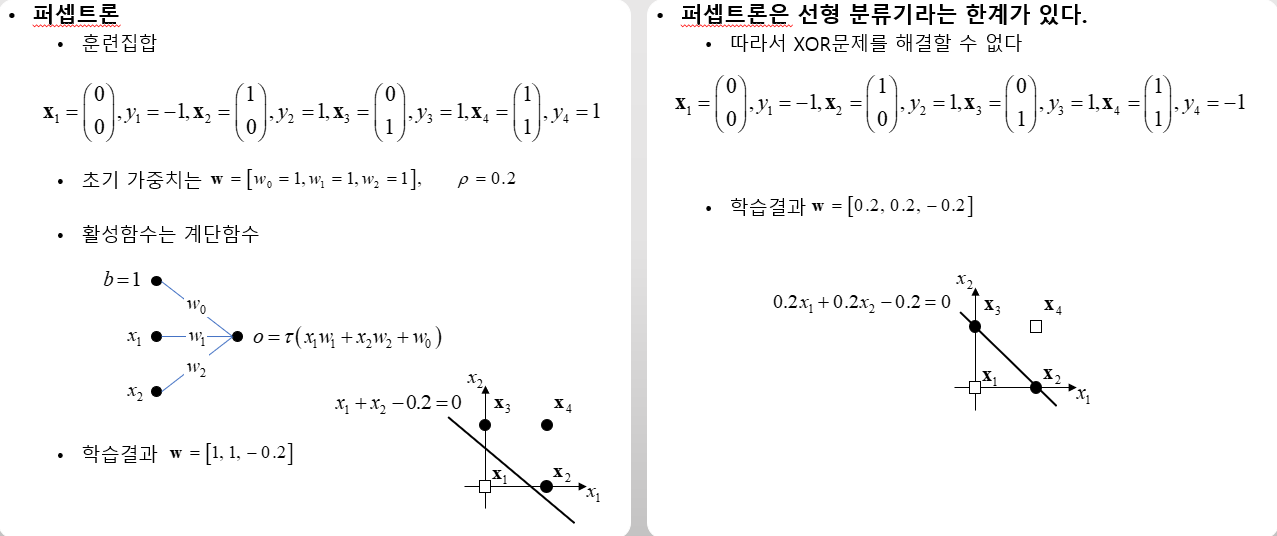

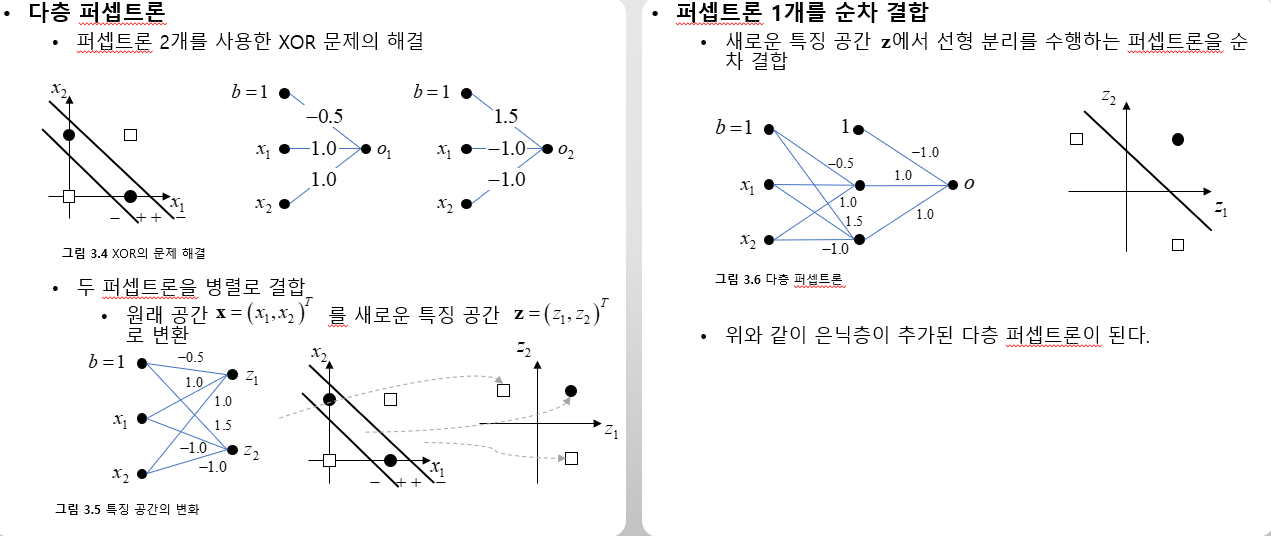

XOR문제에 대한 한계는 층을 쌀으면 이진 계단 함수를 사용한 모델도 비선형적 데이터를 예측할 수 있다. 하지만 또 다른 단점은 역전파 알고리즘을 사용하지 못하는 것이다. 계단 함수는 0에서 미분값이 없고 나머지 부분에서 미분값이 0이기 때문이다.
또한 다중 출력이 불가능 하다.

## 14-8. 활성화 함수의 종류 (2) 선형 활성화 함수

선형화 함수로 XOR를 분류하는 것은 불가능 하다.

## 14-9. 활성화 함수의 종류 (3) 비선형 활성화 함수-시그모이드, Softmax

### 시그모이드 / 로지스틱

* 시그모이드(Sigmoid) 활성화 함수
$$
\sigma(x)=\frac{1}{1+e^{-x}}$$
  + 시그모이드는 결과값이 0~1로 나온다. 이는 확률을 예측하는 모델에서 자주 사용된다.
  + 시그모이드 함수의 미분은 다음과 같다.  
$$
\begin{align*}
 \frac{d\sigma(x)}{dx} &= \frac{e^{-x}}{(1+e^{-x})^2} \\
      &= \frac{1}{1+e^{-x}}\frac{e^{-x}}{1+e^{-x}} \\
      &= \frac{1}{1+e^{-x}}\left( \frac{1+e^{-x}}{1+e^{-x}}- \frac{1}{1+e^{-x}} \right) \\
      &= \sigma(x)(1-\sigma(x))
\end{align*}
$$

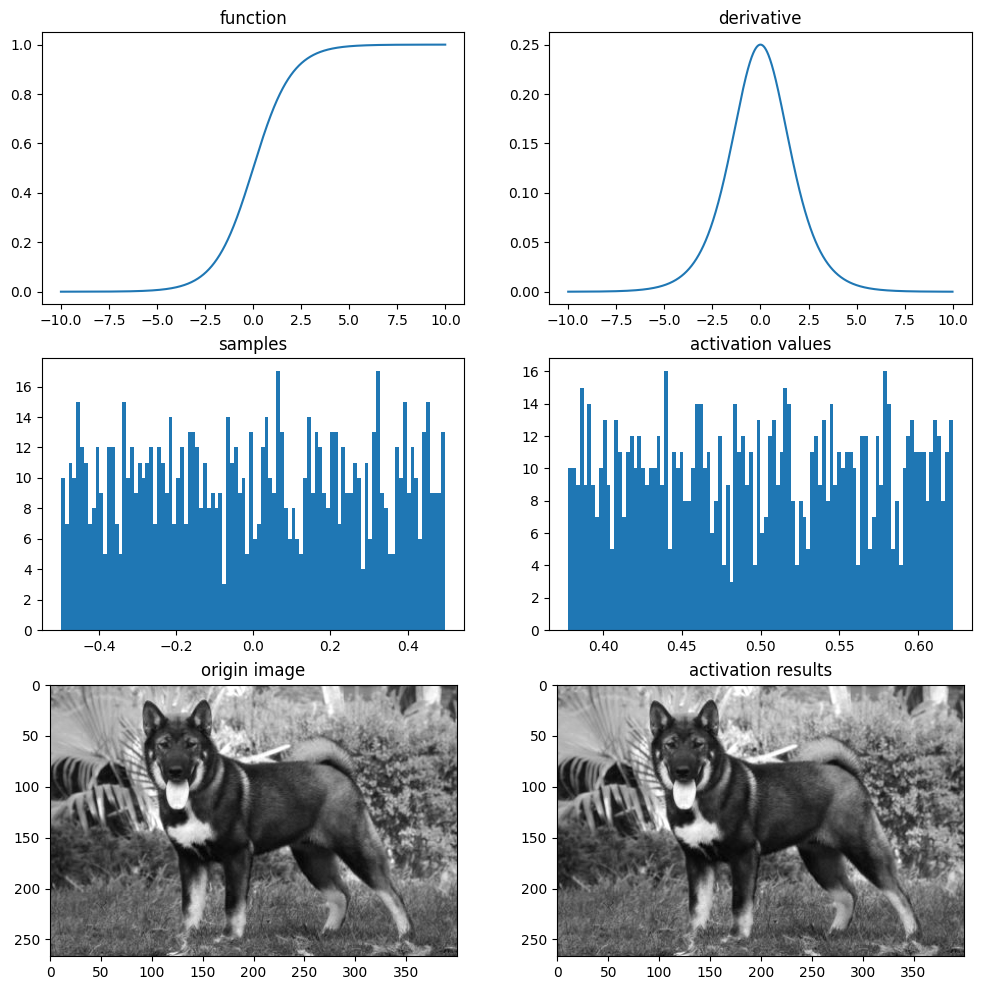

In [17]:
img_path = '/content/drive/MyDrive/Aiffel_Nodes/data_preprocess/jindo_dog.jpg'

# 시그모이드 함수
def sigmoid(x):
    return 1/(1+np.exp(-x).astype(np.float64))

def dev_sigmoid(x):
    return sigmoid(x)*(1-sigmoid(x))

# 시각화
ax = plot_and_visulize(img_path, sigmoid, dev_sigmoid)
ax.show()

* 시그모이드 함수의 두가지 큰 단점
  + **0또는 1에서 포화(saturate)된다.**이는 입력값이 아무리 커져도 함수의 출력은 1에 더 가까워져 갈 뿐 1 이상으로 높아지지 않고, 입력값이 아무리 작아져도 함수의 출력은 0에 더 가까워져 갈 뿐 0 이하로 떨어지지 않는다는 의미이다. 포화가 되면 그레디언트는 0에 가까워지고 이를 'Kill the gradient'라고 표현한다.
  + **출력이 0을 중심(zero-centered)**으로 되어있지 않은 것 또한 훈련 시간을 늘린다. 이는 가중치가 같은 방향으로 업데이트 된다.



### Softmax

* 여러개의 클래스를 분류할 때 사용한다.
* 확률의 성질인 모든 경우의 수(=모든 class)의 확률을 더하면 1이 되는 성질을 가지고 있습니다. 그래서 Softmax는 모델의 마지막 layer에서 활용

## 14-10. 활성화 함수의 종류 (4) 비선형 활성화 함수-하이퍼볼릭 탄젠트

### 하이퍼볼릭 탄젠트
$$
\text{tanh}(x)=\frac{e^x-e^{-x}}{e^x+e^{-x}}$$
* 함수의 치역은 -1 ~ 1 이다. 
* 하이퍼볼릭 탄젠트의 미분은 다음과 같다.
$$
\begin{align*}
  \frac{d}{dx}\text{tanh}(x) &= \frac{d}{dx}\left( \frac{e^x-e^{-x}}{e^x+e^{-x}}\right) \\
  &= -\frac{(e^x-e^{-x})^2 - (e^x+e^{-x})^2}{(e^x+e^{-x})^2} \\
  &= 1-\text{tanh}^2(x)
\end{align*}
$$

* -1 또는 1에서 포화된다.

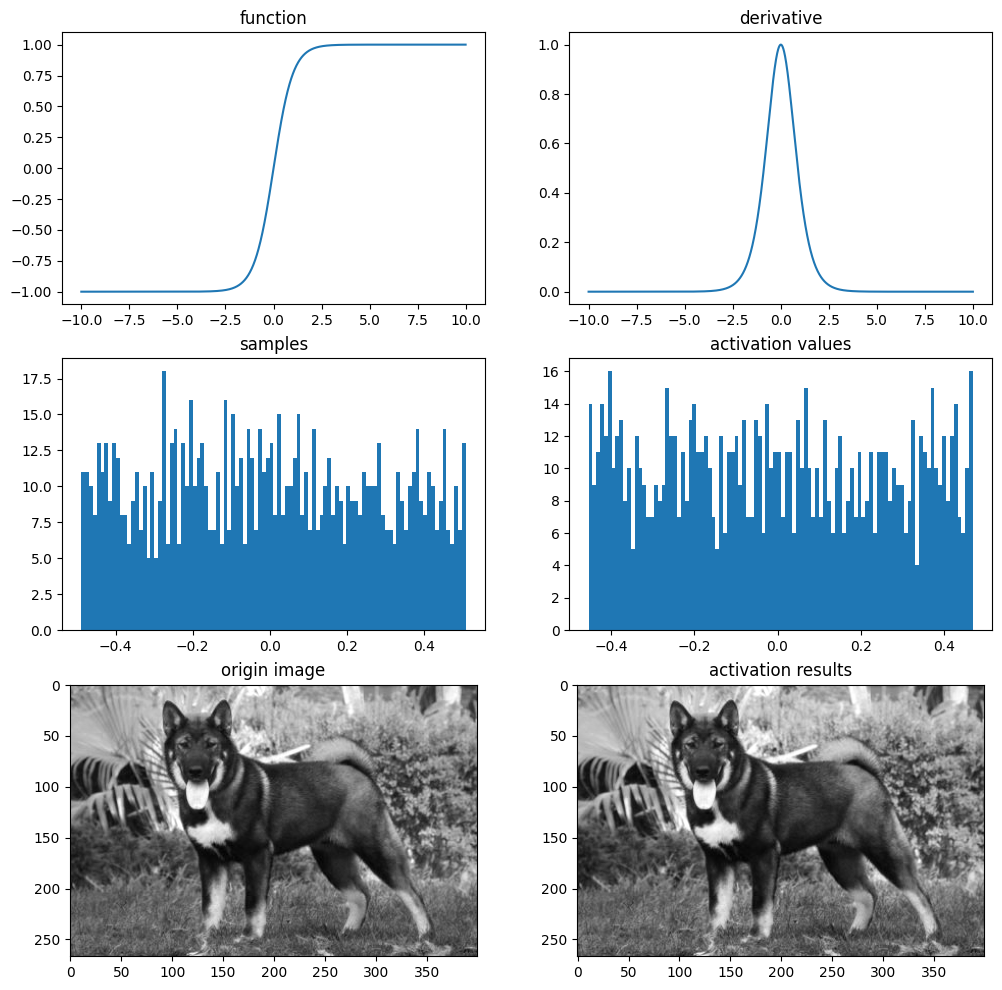

In [18]:
# 하이퍼볼릭 탄젠트 함수
def tanh(x):
    return (np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))

def dev_tanh(x):
    return 1-tanh(x)**2

# 시각화
ax = plot_and_visulize(img_path, tanh, dev_tanh)
ax.show()

## 14-11. 활성화 함수의 종류 (5) 비선형 활성화 함수-ReLU

### ReLU(rectified linear unit) 

$$
f(x)=\text{max}(0,x)$$

* 치역은 0 ~ $∞$ 이다.
* ReLU함수는 간단한 만큼 계산 비용도 적게 들고 더욱 빠른 학습 속도를 보인다.

* ReLU의 미분은 다음과 같다.
$$
f'(x) = 
  \begin{cases} 
   0 & \text{if } x < 0 \\
   1 & \text{if } x < 0
  \end{cases},\text{undefined at }x=0
$$
* 단점은 **Dying ReLU**가중치 업데이트 과정에서 입력값에 상관없이 0이하의 값이 나오게 된다면 그래디언트가 0이 되어 노드가 죽어버린다.

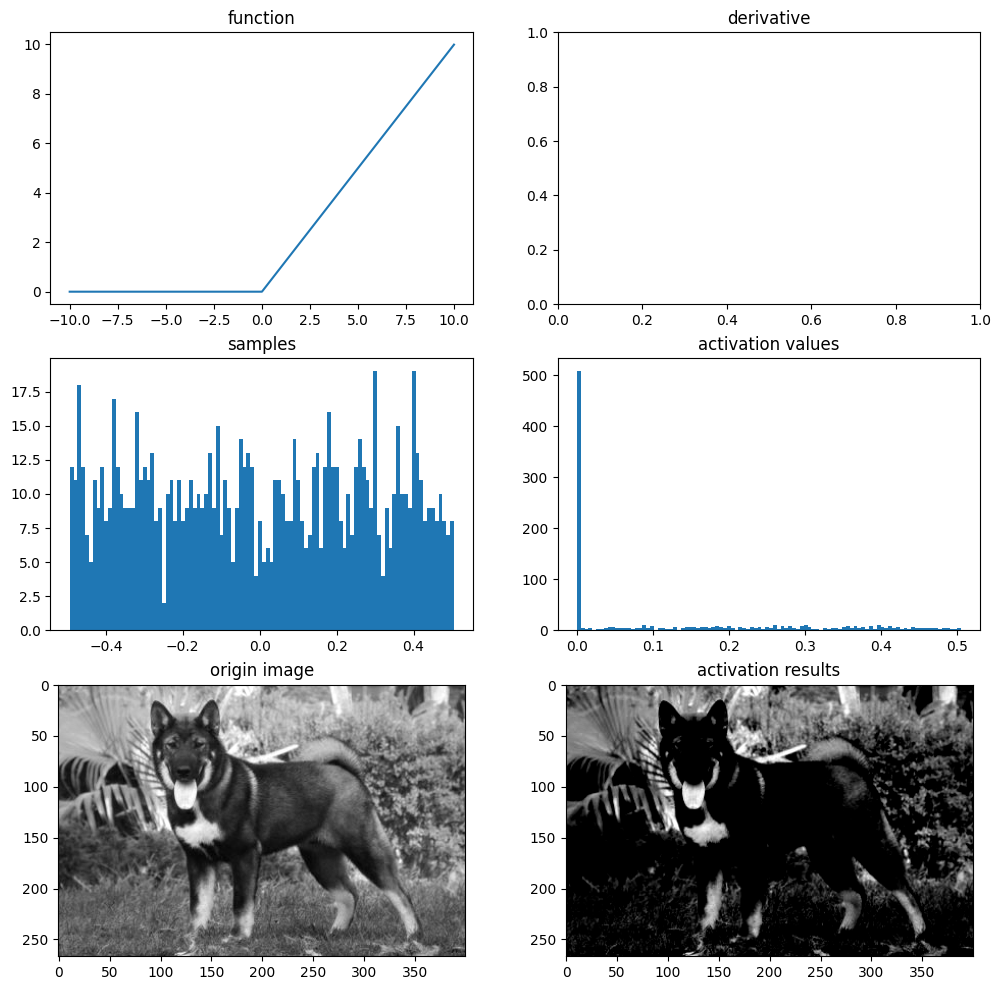

In [19]:
# relu 함수
def relu(x):
    return max(0,x)

# 시각화
ax = plot_and_visulize(img_path, relu)
ax.show()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 6)                 12        
                                                                 
 dense_7 (Dense)             (None, 1)                 7         
                                                                 
Total params: 19
Trainable params: 19
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 2)                 4         
                                                                 
 dense_9 (Dense)             (None, 2)                 6         
                                                                 
 dense_10 (Dense)            (None, 

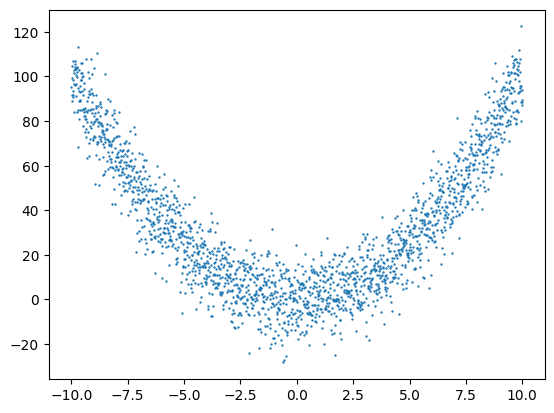

In [23]:
q_X = np.array([-10+x/100 for x in range(2001)])
q_y = np.array([(x)**2 + np.random.randn(1)*10 for x in q_X])
plt.scatter(q_X, q_y, s=0.5)

approx_relu_model_p = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(6, activation='relu'), # 6 nodes 병렬 연결
    tf.keras.layers.Dense(1)
])
approx_relu_model_p.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=0.005), metrics=['accuracy'])
approx_relu_model_p.fit(q_X, q_y, batch_size=32, epochs=100, verbose=0)

approx_relu_model_s = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(2, activation='relu'),# 2 nodes 직렬로 3번 연결
    tf.keras.layers.Dense(2, activation='relu'),
    tf.keras.layers.Dense(2, activation='relu'),
    tf.keras.layers.Dense(1)
])
approx_relu_model_s.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=0.005), metrics=['accuracy'])
approx_relu_model_s.fit(q_X, q_y, batch_size=32, epochs=100, verbose=0)

approx_relu_model_p.summary()
approx_relu_model_s.summary()

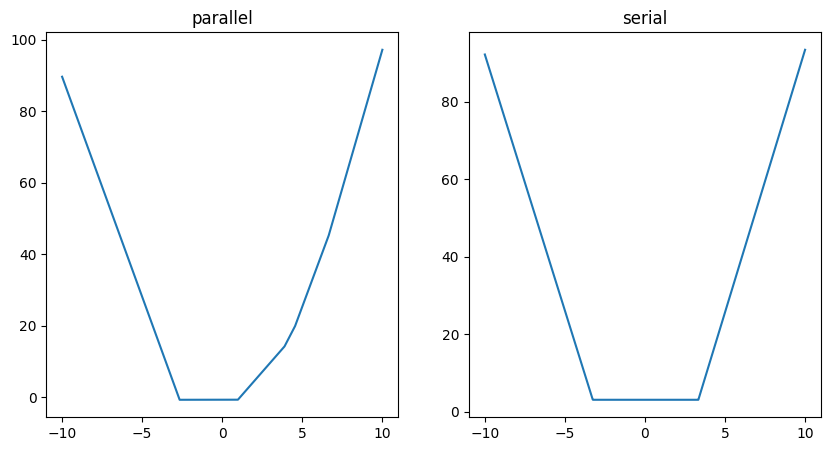

In [24]:
q_test_X = q_X.reshape((*q_X.shape,1))
plt.figure(figsize=(10,5))

ax1 = plt.subplot(1,2,1)
ax1.set_title('parallel')
pred_y_p = approx_relu_model_p(q_test_X)
ax1.plot(q_X, pred_y_p)

ax2 = plt.subplot(1,2,2)
ax2.set_title('serial')
pred_y_s = approx_relu_model_s(q_test_X)
ax2.plot(q_X, pred_y_s)

plt.show()

## 14-12. 활성화 함수의 종류 (6) 비선형 활성화 함수-ReLU의 단점을 극복하기 위한 시도들

### Leaky ReLU

* ReLU에서 0으로 출력되던 부분을 아주 작은 음수값을 출력하게 만들어 문제를 해결



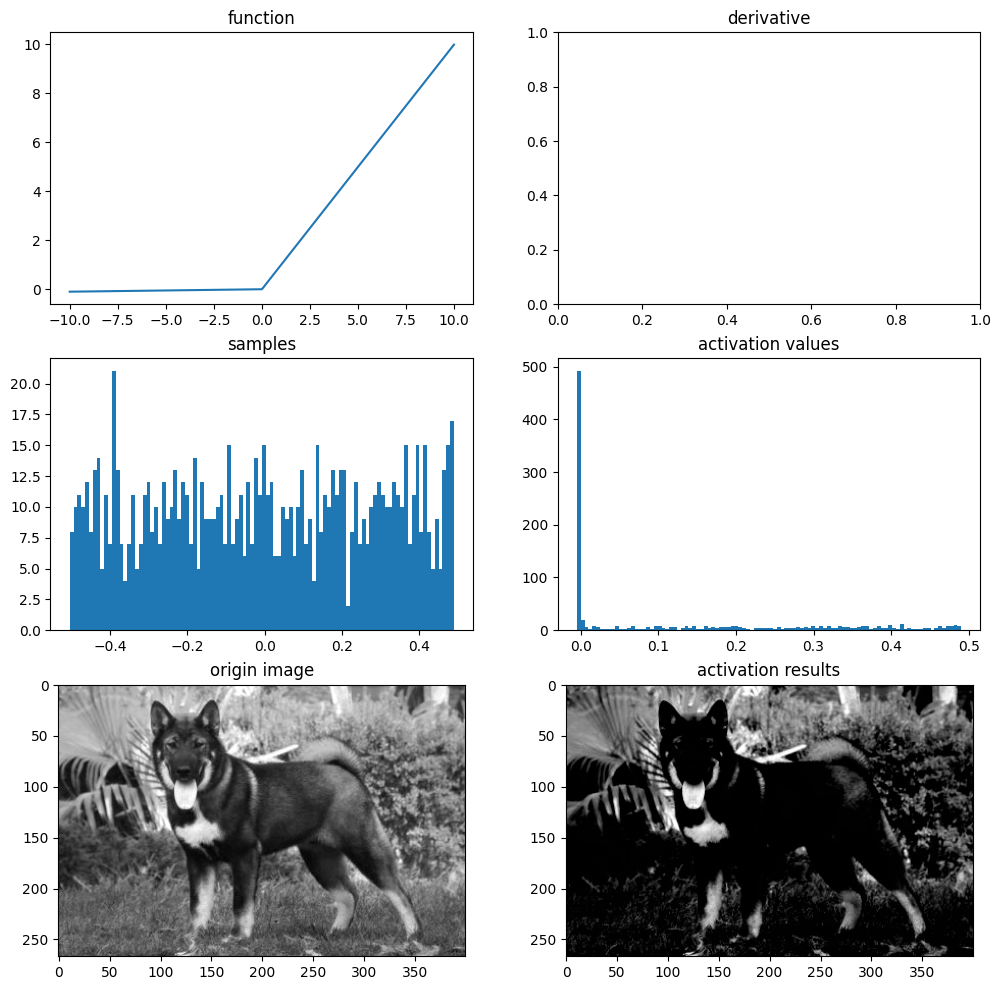

In [25]:
# leaky relu 함수
def leaky_relu(x):
    return max(0.01*x,x)

# 시각화
ax = plot_and_visulize(img_path, leaky_relu)
ax.show()

### PReLU(parametric ReLU)

* 0 미만일 때의 기울기가 훈련되도록 변경


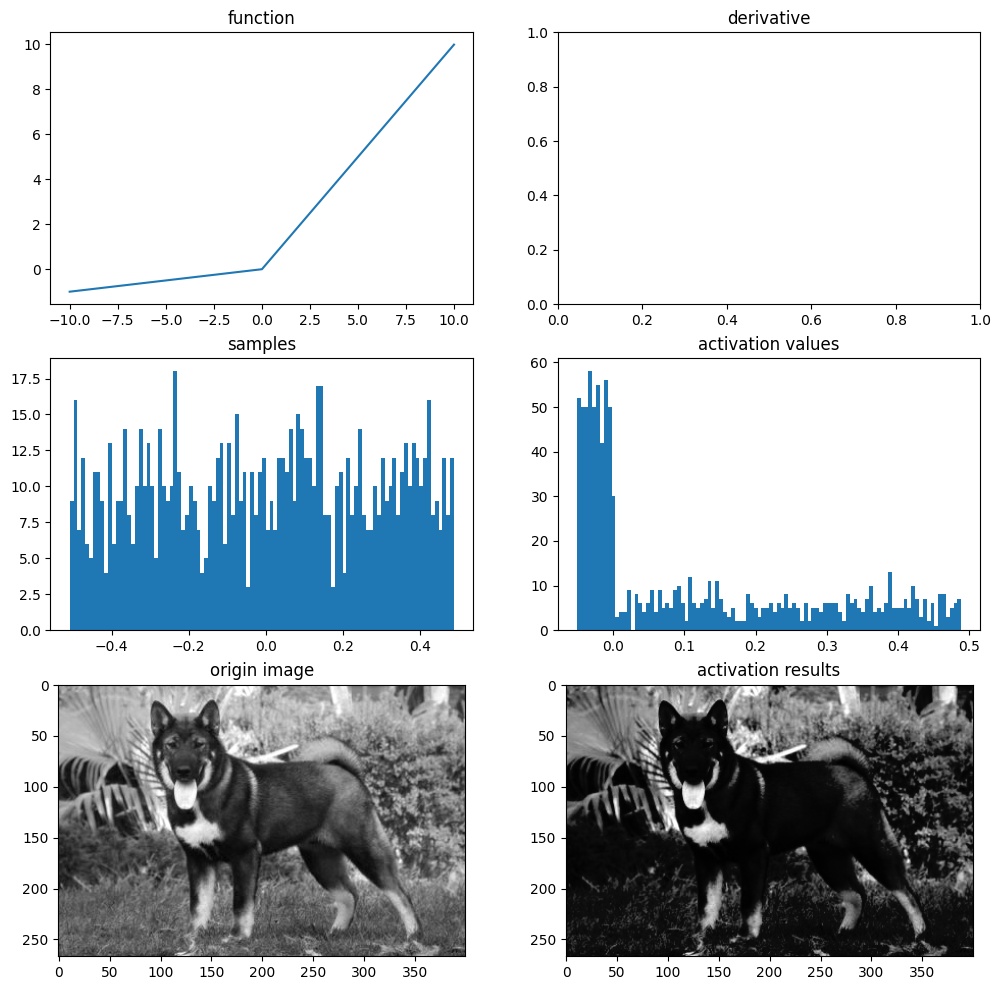

In [26]:
# PReLU 함수 alpha가 훈련과정 업데이트
def prelu(x, alpha):
    return max(alpha*x,x)

# 시각화
ax = plot_and_visulize(img_path, lambda x: prelu(x, 0.1)) # parameter alpha=0.1일 때

ax.show()

### ELU(exponential linear unit)
* ReLU의 모든 장점을 포함하고, 0이 중심이 아니었던 단점,'Dying ReLU'문제를 해결한 활성함수이다.
$$
f(x)=
\begin{cases} 
   x &             \text{if } x > 0 \\
   \alpha(e^x-1) & \text{if } x \le 0
\end{cases}$$

* ELU의 미분은 논문에서 다음과 같이 정의.
$$
f'(x)=
\begin{cases} 
   1 &           \text{if } x > 0 \\
   f(x)+\alpha & \text{if } x \le 0
\end{cases}$$

* 단점은 exponential 연산이 들어가서 계산 비용이 높아졌다는 점

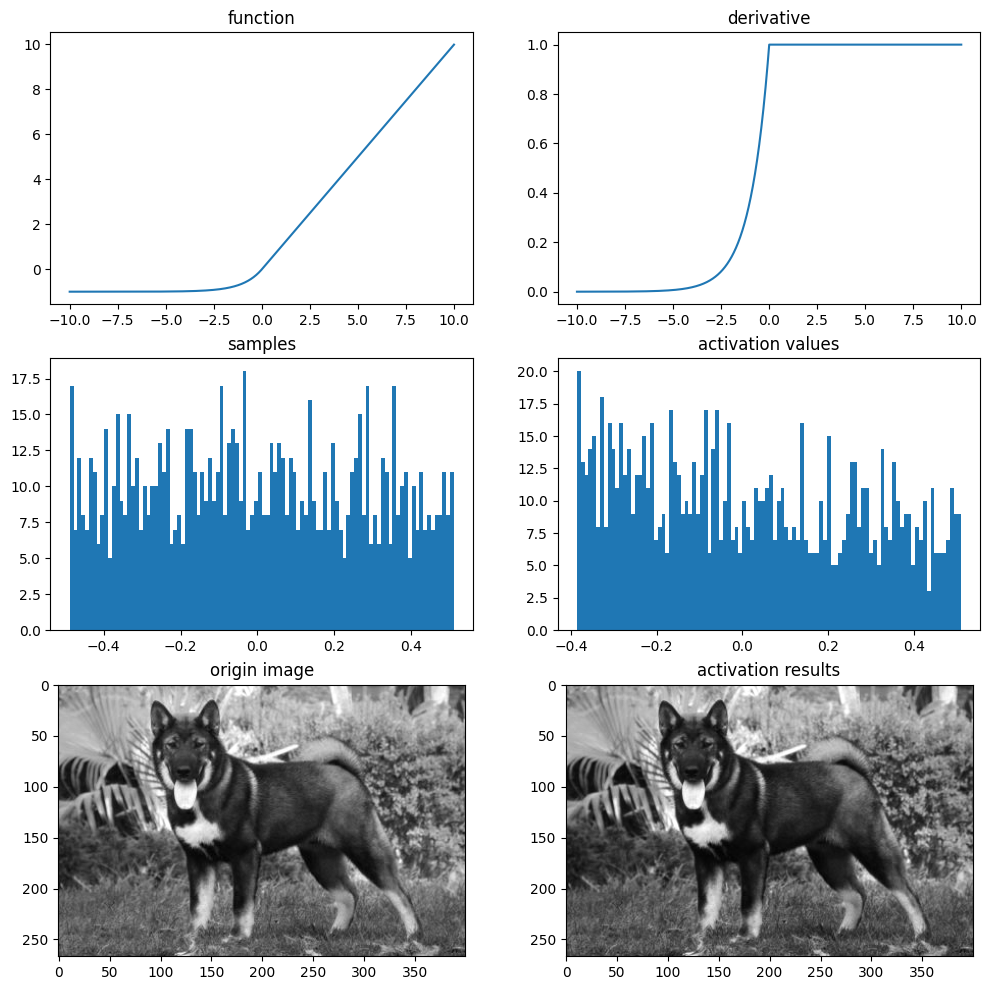

In [27]:
# elu 함수
def elu(x, alpha):
    return x if x > 0 else alpha*(np.exp(x)-1)

def dev_elu(x, alpha):
    return 1 if x > 0 else elu(x, alpha) + alpha

# 시각화
ax = plot_and_visulize(img_path, lambda x: elu(x, 1), lambda x: dev_elu(x, 1)) # alpha가 1일 때
ax.show()